In [1]:
import time
import random

def f(x, y, z):
    """The given function f(x,y,z) = z(x² + y²)"""
    return z * (x*x + y*y)

In [2]:
def riemann_integration(n):
    """Riemann sum method using midpoint rule"""
    total = 0.0
    dz = 2.0 / n
    
    for i in range(n):
        z = (i + 0.5) * dz
        if z <= 0:
            continue
            
        sqrt_z = z ** 0.5
        dx = sqrt_z / n
        
        for j in range(n):
            x = (j + 0.5) * dx
            upper_y = x * z
            
            if upper_y > 0:
                dy = upper_y / n
                for k in range(n):
                    y = (k + 0.5) * dy
                    total += f(x, y, z) * dx * dy * dz
    return total

In [3]:


def monte_carlo_integration(n_samples):
    """Monte Carlo integration method"""
    total = 0.0
    
    for _ in range(n_samples):
        z = random.uniform(0, 2)
        if z <= 0:
            continue
            
        sqrt_z = z ** 0.5
        x = random.uniform(0, sqrt_z)
        upper_y = x * z
        
        if upper_y > 0:
            y = random.uniform(0, upper_y)
            # Volume element: 2 * sqrt_z * upper_y
            total += f(x, y, z) * sqrt_z * upper_y
    
    return 2.0 * total / n_samples



In [4]:
# Theoretical value from manual calculation
theoretical = 328/105
print("=== VOLUMETRIC INTEGRATION COMPARISON ===")
print(f"Theoretical value: {theoretical:.8f}")

# Test Riemann Sum Method
print(f"\n1. RIEMANN SUM METHOD:")
print("n\tResult\t\tError\t\tError%\t\tTime(s)")
riemann_n = [10, 25, 50, 100]

for n in riemann_n:
    start = time.time()
    result = riemann_integration(n)
    runtime = time.time() - start
    error = abs(result - theoretical)
    error_percent = (error/theoretical) * 100
    
    print(f"{n}\t{result:.6f}\t{error:.6f}\t{error_percent:.3f}%\t\t{runtime:.4f}")

# Test Monte Carlo Method
print(f"\n2. MONTE CARLO METHOD:")
print("n\tResult\t\tError\t\tError%\t\tTime(s)")
mc_samples = [1000, 10000, 50000, 100000]

for n in mc_samples:
    start = time.time()
    result = monte_carlo_integration(n)
    runtime = time.time() - start
    error = abs(result - theoretical)
    error_percent = (error/theoretical) * 100
    
    print(f"{n}\t{result:.6f}\t{error:.6f}\t{error_percent:.3f}%\t\t{runtime:.4f}")

print(f"\n=== PRECISION ANALYSIS ===")
print("RIEMANN SUM:")
print("- Deterministic convergence: Error ∝ 1/n²")
print("- More subdivisions → higher precision")
print("- Very stable and predictable")

print(f"\nMONTE CARLO:")
print("- Stochastic convergence: Error ∝ 1/√n")
print("- More samples → higher precision")
print("- Results vary between runs")

print(f"\n=== HOW TO INCREASE PRECISION ===")
print("RIEMANN SUM:")
print("- Increase n (subdivisions)")
print("- Use higher-order rules (Simpson's, etc.)")
print("- Adaptive mesh refinement")

print(f"\nMONTE CARLO:")
print("- Increase sample size")
print("- Use variance reduction techniques")
print("- Importance sampling")

print(f"\n=== RUNTIME IMPACT ===")
print("RIEMANN SUM:")
print("- Complexity: O(n³) due to triple nested loops")
print("- Runtime increases CUBICALLY with precision")
print("- 2x precision → 8x runtime")

print(f"\nMONTE CARLO:")
print("- Complexity: O(n) linear with samples")
print("- Runtime increases LINEARLY with precision")
print("- 2x precision → 2x runtime")

print(f"\nCONCLUSION:")
print("- Riemann: Better for high precision, expensive")
print("- Monte Carlo: Better for high dimensions, scalable")

=== VOLUMETRIC INTEGRATION COMPARISON ===
Theoretical value: 3.12380952

1. RIEMANN SUM METHOD:
n	Result		Error		Error%		Time(s)
10	3.064844	0.058966	1.888%		0.0000
25	3.114313	0.009497	0.304%		0.0070
50	3.121433	0.002376	0.076%		0.0555
100	3.123215	0.000594	0.019%		0.3348

2. MONTE CARLO METHOD:
n	Result		Error		Error%		Time(s)
1000	2.640697	0.483113	15.466%		0.0010
10000	3.085963	0.037847	1.212%		0.0161
50000	3.143798	0.019988	0.640%		0.0651
100000	3.057310	0.066499	2.129%		0.1331

=== PRECISION ANALYSIS ===
RIEMANN SUM:
- Deterministic convergence: Error ∝ 1/n²
- More subdivisions → higher precision
- Very stable and predictable

MONTE CARLO:
- Stochastic convergence: Error ∝ 1/√n
- More samples → higher precision
- Results vary between runs

=== HOW TO INCREASE PRECISION ===
RIEMANN SUM:
- Increase n (subdivisions)
- Use higher-order rules (Simpson's, etc.)
- Adaptive mesh refinement

MONTE CARLO:
- Increase sample size
- Use variance reduction techniques
- Importance sampling

===

Solution from Sum of Squared Residual Errors (SSE):
x1 = 1.1111
x2 = -0.8889
----------------------------------------
Solution from Pseudo-inverse:
x1 = 1.1111
x2 = -0.8889
----------------------------------------
The solutions from both methods are identical.


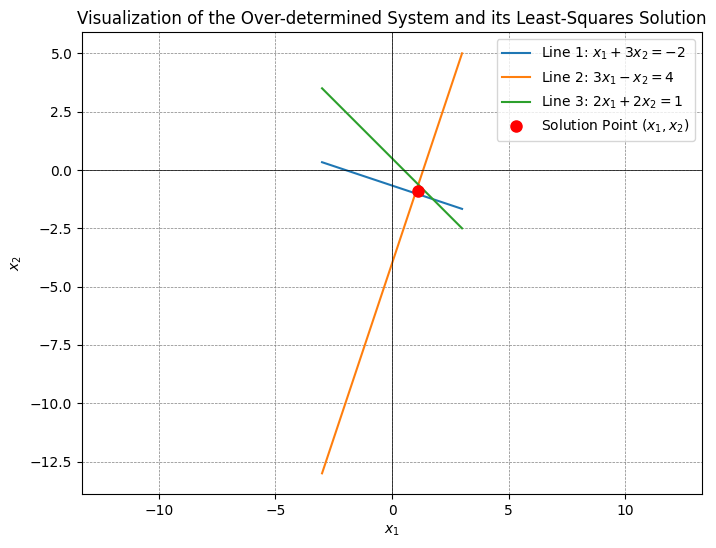

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define the system of equations Ax = b
A = np.array([[1, 3],
              [3, -1],
              [2, 2]])

b = np.array([[-2],
              [4],
              [1]])

# --- Method 1: Sum of Squared Residual Errors (Least Squares) ---
# The solution is found by solving the normal equations: A^T * A * x = A^T * b
A_T = A.T
A_T_A = A_T @ A
A_T_b = A_T @ b

# Solve for x using the inverse of A_T_A
x_sse = np.linalg.inv(A_T_A) @ A_T_b

print("Solution from Sum of Squared Residual Errors (SSE):")
print(f"x1 = {x_sse[0][0]:.4f}")
print(f"x2 = {x_sse[1][0]:.4f}")
print("-" * 40)

# --- Method 2: Pseudo-inverse ---
# The pseudo-inverse solution is x = A^+ * b = (A^T * A)^-1 * A^T * b
A_plus = np.linalg.pinv(A)
x_pseudo = A_plus @ b

print("Solution from Pseudo-inverse:")
print(f"x1 = {x_pseudo[0][0]:.4f}")
print(f"x2 = {x_pseudo[1][0]:.4f}")
print("-" * 40)

# The solutions are the same, as expected
assert np.allclose(x_sse, x_pseudo)
print("The solutions from both methods are identical.")

# --- Visualization ---

# Define a range for x1 to plot the lines
x1_vals = np.linspace(-3, 3, 400)

# Equation 1: x1 + 3x2 = -2  =>  x2 = (-2 - x1) / 3
x2_eq1 = (-2 - x1_vals) / 3

# Equation 2: 3x1 - x2 = 4  =>  x2 = 3x1 - 4
x2_eq2 = 3 * x1_vals - 4

# Equation 3: 2x1 + 2x2 = 1  =>  x2 = (1 - 2x1) / 2
x2_eq3 = (1 - 2 * x1_vals) / 2

# Plot the lines and the solution point
plt.figure(figsize=(8, 6))
plt.plot(x1_vals, x2_eq1, label='Line 1: $x_1 + 3x_2 = -2$')
plt.plot(x1_vals, x2_eq2, label='Line 2: $3x_1 - x_2 = 4$')
plt.plot(x1_vals, x2_eq3, label='Line 3: $2x_1 + 2x_2 = 1$')

# Plot the calculated solution point from both methods
plt.plot(x_sse[0], x_sse[1], 'ro', markersize=8, label='Solution Point $(x_1, x_2)$')

# Add labels and title
plt.title('Visualization of the Over-determined System and its Least-Squares Solution')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.legend()
plt.axis('equal') # Ensures a true representation of angles and distances
plt.show()